## Diffraction grating: $N$-slit interference

One of the reasons that $N-$slit interference is so important is that in the large $N$ limit we obtain a **grating**.

Diffraction gratings - based on ruling lines in metal - were invented by **Fraunhofer**. His motivation was to separate different
wavelengths so that he could study **dispersion** in lenses, and then eliminate **chromatic abberation** in order to make better telescopes.

This Notebook investigate $N$-slit diffraction for multicoloured light. 

We can specify the number of slits $N$, and also the spectrum of the input light.

We shall focus on the difference between a double slit $N=2$ and many slits $N=10$ - not exactly the grating limit 
but large enough to resolve different wavelengths.

What we find is that for $N=2$ interference pattern is *washed out*. We might say that this must mean that our source is
**incoherent**. 

However we argue in Chapter 8 of <a href="https://global.oup.com/academic/product/optics-f2f-9780198786795?cc=gb&lang=en&">Opticsf2f</a> 
**coherence** is a property of the measurement as much as the source. 

This code demonstrates that simply by increasing
the number of slits we resolve the fringes for each colour and hence would deduce that our source is coherent.

If you scroll down to the bottom there is an interactive plot where you can vary $N$ using a slider.

The Jupyter Notebook is Grating.ipynb see

https://github.com/opticsf2f/Opticsf2f_CodeBook


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from numpy.fft import fft2, ifft2, fftshift

import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams["text.latex.preamble"]  = r"\usepackage{amsmath} \usepackage{amssymb} \usepackage[bitstream-charter]{mathdesign}"
mpl.rcParams["text.usetex"] = True

Define a rectanlge shape to represent a slit.

In [2]:
def Rectangle(x,y,x0,y0,a,b,rotation):
    xa = (x-x0)*np.cos(rotation) + (y-y0)*np.sin(rotation)
    ya = (y-y0)*np.cos(rotation) - (x-x0)*np.sin(rotation)
    return (xa > (-a/2)) & (xa < (a/2)) & (ya > (-b/2)) & (ya < (b/2))

Add arrows and text to plots

In [3]:
def plotting_function(ax_ref1,ax_ref2,plot_label,x_axis_label,y_axis_label,zoom_x_pts,zoom_y_pts):
    fs = 36
    axs[ax_ref1,ax_ref2].text(zoom_x_pts/20,zoom_x_pts/8,plot_label,fontsize = fs, color='white')
    axs[ax_ref1,ax_ref2].text(6*zoom_x_pts/20, 18.5*zoom_x_pts/20,x_axis_label,fontsize = fs, color='white')
    axs[ax_ref1,ax_ref2].text(1.5*zoom_x_pts/20, 14*zoom_x_pts/20,y_axis_label,fontsize = fs, color='white')

    axs[ax_ref1,ax_ref2].set_axis_off()
    arrow = mpatches.FancyArrow(1*zoom_x_pts/20, 19*zoom_x_pts/20,  zoom_x_pts/4, 0, width=zoom_x_pts/256, head_width = zoom_x_pts/64, 
                            head_length = zoom_x_pts/16, length_includes_head=True, color = 'white')
    axs[ax_ref1,ax_ref2].add_patch(arrow)
    arrow = mpatches.FancyArrow(1*zoom_x_pts/20, 19*zoom_x_pts/20,  0, -zoom_x_pts/4, width=zoom_x_pts/256, head_width = zoom_x_pts/64, 
                            head_length = zoom_x_pts/16, length_includes_head=True, color = 'white')
    axs[ax_ref1,ax_ref2].add_patch(arrow)

Create the input image and the Fourier transform (Fraunhofer diffraction pattern).

To model different wave lengths we rescale the input before calculating the 2D Fourier transform.

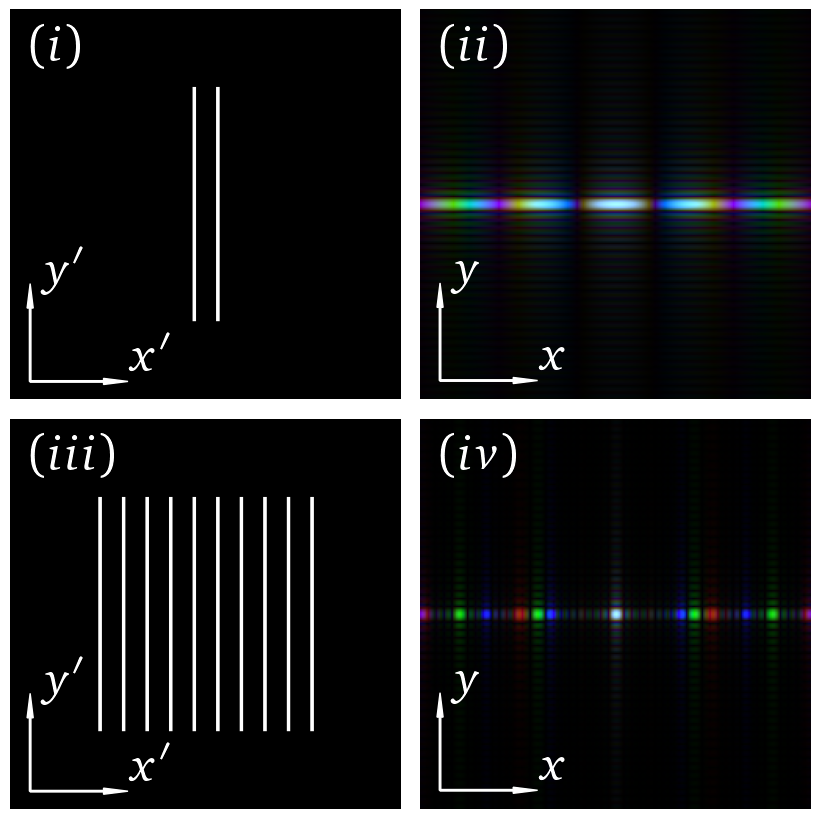

In [4]:
xmin = 0
xmax = 1000
xp = xmax/2
yp = xmax/2
dx = 1
zoom = 1
X, Y = np.mgrid[xmin/zoom:xmax/zoom:dx/zoom,xmin/zoom:xmax/zoom:dx/zoom]
x_pts, y_pts = np.shape(X)

fig, axs = plt.subplots(2,2,figsize=(8, 8),dpi = 100)

R = np.zeros((x_pts,y_pts))
G = np.zeros((x_pts,y_pts))
B = np.zeros((x_pts,y_pts))

rot = 0
N = 2
d = 10
a = 200
b = 4 #slits

for nslit in range(0,N):
    R+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*d,a,b,rot) 
    G+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*d,a,b,rot) 
    B+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*d,a,b,rot) 

R = np.clip(R,0.0,1.0)
G = np.clip(G,0.0,1.0)
B = np.clip(B,0.0,1.0)
RGB = np.dstack((R, G, B))


zoom =3
x_pts, y_pts  = np.shape(RGB[:,:,0]) 
xc, yc = int(x_pts/2), int(y_pts/2)
xz, yz = int(x_pts/(2*zoom)), int(y_pts/(2*zoom))

axs[0,0].imshow(RGB[xc-xz:xc+xz,yc-yz:yc+yz])
axs[0,0].set_axis_off()
#ax1.set_xlim(400,600)
#ax1.set_ylim(400,600)

plotting_function(0,0,"$(i)$","$x'$","$y'$",int(x_pts/zoom),int(y_pts/zoom))


# now start again in lambda scaled units
R = np.zeros((x_pts,y_pts))
G = np.zeros((x_pts,y_pts))
B = np.zeros((x_pts,y_pts))

lambdaR = 1.23 # 650/530 = 1.23  
lambdaG = 1.00
lambdaB = 0.83 # 440/530 = 0.83
dR = d/lambdaR
aR = a/lambdaR
bR = b/lambdaR

for nslit in range(0,N):
    R+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*dR,aR,bR,rot) 
dG = d/lambdaG
aG = a/lambdaG
bG = b/lambdaG
for nslit in range(0,N):
    G+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*dG,aG,bG,rot) 
dB = d/lambdaB
aB = a/lambdaB
bB = b/lambdaB
for nslit in range(0,N):
    B+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*dB,aB,bB,rot) 

gamma = 0.4
Brightness = 1.0
FR = np.zeros((x_pts,y_pts))
FG = np.zeros((x_pts,y_pts))
FB = np.zeros((x_pts,y_pts))

if np.amax(R) > 0.5:
    F = fftshift(fft2(R))
    FR = F.real *F.real + F.imag *F.imag
    FR = (1/lambdaR**2)*Brightness*(FR/np.amax(FR))**gamma
if np.amax(G) > 0.5:
    F = fftshift(fft2(G))
    FG = F.real *F.real + F.imag *F.imag
    FG = Brightness*(FG/np.amax(FG))**gamma
if np.amax(B) > 0.5:
    F = fftshift(fft2(B))
    FB = F.real *F.real + F.imag *F.imag
    FB = (1/lambdaB**2)*Brightness*(FB/np.amax(FB))**gamma
FR = np.clip(FR,0.0,1.0)
FG = np.clip(FG,0.0,1.0)
FB = np.clip(FB,0.0,1.0)
FRGB = np.dstack((FR, FG, FB))
zoom =4
x_pts, y_pts  = np.shape(RGB[:,:,0]) 
xc, yc = int(x_pts/2), int(y_pts/2)
xz, yz = int(x_pts/(2*zoom)), int(y_pts/(2*zoom))
axs[0,1].imshow(FRGB[xc-xz:xc+xz,yc-yz:yc+yz])
axs[0,1].set_axis_off()
plotting_function(0,1,"$(ii)$","$x$","$y$",int(x_pts/zoom),int(y_pts/zoom))


R = np.zeros((x_pts,y_pts))
G = np.zeros((x_pts,y_pts))
B = np.zeros((x_pts,y_pts))

rot = 0
N = 10
d = 10
a = 200
b = 4 #slits

for nslit in range(0,N):
    R+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*d,a,b,rot) 
    G+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*d,a,b,rot) 
    B+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*d,a,b,rot) 

R = np.clip(R,0.0,1.0)
G = np.clip(G,0.0,1.0)
B = np.clip(B,0.0,1.0)
RGB = np.dstack((R, G, B))


zoom =3
x_pts, y_pts  = np.shape(RGB[:,:,0]) 
xc, yc = int(x_pts/2), int(y_pts/2)
xz, yz = int(x_pts/(2*zoom)), int(y_pts/(2*zoom))

axs[1,0].imshow(RGB[xc-xz:xc+xz,yc-yz:yc+yz])
axs[1,0].set_axis_off()
plotting_function(1,0,"$(iii)$","$x'$","$y'$",int(x_pts/zoom),int(y_pts/zoom))

# now start again in lambda scaled units
R = np.zeros((x_pts,y_pts))
G = np.zeros((x_pts,y_pts))
B = np.zeros((x_pts,y_pts))

lambdaR = 1.23 # 650/530 = 1.23  
lambdaG = 1.00
lambdaB = 0.83 # 440/530 = 0.83
dR = d/lambdaR
aR = a/lambdaR
bR = b/lambdaR

for nslit in range(0,N):
    R+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*dR,aR,bR,rot) 
dG = d/lambdaG
aG = a/lambdaG
bG = b/lambdaG
for nslit in range(0,N):
    G+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*dG,aG,bG,rot) 
dB = d/lambdaB
aB = a/lambdaB
bB = b/lambdaB
for nslit in range(0,N):
    B+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*dB,aB,bB,rot) 

gamma = 0.4
Brightness = 1.0
FR = np.zeros((x_pts,y_pts))
FG = np.zeros((x_pts,y_pts))
FB = np.zeros((x_pts,y_pts))

if np.amax(R) > 0.5:
    F = fftshift(fft2(R))
    FR = F.real *F.real + F.imag *F.imag
    FR = (1/lambdaR**2)*Brightness*(FR/np.amax(FR))**gamma
if np.amax(G) > 0.5:
    F = fftshift(fft2(G))
    FG = F.real *F.real + F.imag *F.imag
    FG = Brightness*(FG/np.amax(FG))**gamma
if np.amax(B) > 0.5:
    F = fftshift(fft2(B))
    FB = F.real *F.real + F.imag *F.imag
    FB = (1/lambdaB**2)*Brightness*(FB/np.amax(FB))**gamma
FR = np.clip(FR,0.0,1.0)
FG = np.clip(FG,0.0,1.0)
FB = np.clip(FB,0.0,1.0)
FRGB = np.dstack((FR, FG, FB))
zoom =4
x_pts, y_pts  = np.shape(RGB[:,:,0]) 
xc, yc = int(x_pts/2), int(y_pts/2)
xz, yz = int(x_pts/(2*zoom)), int(y_pts/(2*zoom))

axs[1,1].imshow(FRGB[xc-xz:xc+xz,yc-yz:yc+yz])
axs[1,1].set_axis_off()
plotting_function(1,1,"$(iv)$","$x$","$y$",int(x_pts/zoom),int(y_pts/zoom))


plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.0,wspace=0.05,hspace=0.05)

What do we learn from this image? For 2 slits, the interference pattern washes out as we move off axis.
We cannot distinguish whether the input is white light with a continuous spectrum or 
pseudo-white light made up up discrete colours.

As we increase the number of slits we see that in the first order of the diffraction the red, green and blue spectral
components are well-resolved.

In [5]:
fig.savefig('GratingRes.png',bbox_inches='tight')

**Interactive figure**

The next part of the code creates an interactive figure. This needs some additional code that is described
at 
https://github.com/nikolasibalic/Interactive-Publishing

The code is contained in the ifigures directory. You may be to add some fonts to your latex install.
Also install imagemick and comment out line

```
<policy domain="codes" rights="None" pattern="PDF"/>
```

Like this.

```
<!-- <policy domain="codes" rights="None" pattern="PDF"/> -->
```

near the bottom of the file

/etc/ImageMagick-6/policy.xml

In [6]:
from ifigures import *
from ifigures.my_plots import *

In [7]:
def GratingFig(N):
    xmin = 0
    xmax = 1000
    xp = xmax/2
    yp = xmax/2
    dx = 1
    zoom = 1
    X, Y = np.mgrid[xmin/zoom:xmax/zoom:dx/zoom,xmin/zoom:xmax/zoom:dx/zoom]
    x_pts, y_pts = np.shape(X)

    R = np.zeros((x_pts,y_pts))
    G = np.zeros((x_pts,y_pts))
    B = np.zeros((x_pts,y_pts))

    rot = 0
    d = 8
    a = 250
    b = 4 #slits

    for nslit in range(0,N):
        R+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*d,a,b,rot) 
        G+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*d,a,b,rot) 
        B+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*d,a,b,rot) 

    R = np.clip(R,0.0,1.0)
    G = np.clip(G,0.0,1.0)
    B = np.clip(B,0.0,1.0)
    RGB = np.dstack((R, G, B))

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 8),dpi = 60)
    ax1.imshow(RGB)
    ax1.set_axis_off()
    #ax1.set_xlim(400,600)
    #ax1.set_ylim(400,600)

    # now start again in lambda scaled units
    R = np.zeros((x_pts,y_pts))
    G = np.zeros((x_pts,y_pts))
    B = np.zeros((x_pts,y_pts))

    lambdaR = 1.23 # 650/530 = 1.23  
    lambdaG = 1.00
    lambdaB = 0.83 # 440/530 = 0.83
    dR = d/lambdaR
    aR = a/lambdaR
    bR = b/lambdaR
    for nslit in range(0,N):
        R+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*dR,aR,bR,rot) 
    dG = d/lambdaG
    aG = a/lambdaG
    bG = b/lambdaG
    for nslit in range(0,N):
        G+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*dG,aG,bG,rot) 
    dB = d/lambdaB
    aB = a/lambdaB
    bB = b/lambdaB
    for nslit in range(0,N):
        B+=Rectangle(X,Y,xp,yp-(N-(2*nslit+1))*dB,aB,bB,rot) 

    gamma = 0.4
    Brightness = 1.0
    FR = np.zeros((x_pts,y_pts))
    FG = np.zeros((x_pts,y_pts))
    FB = np.zeros((x_pts,y_pts))

    if np.amax(R) > 0.5:
        F = fftshift(fft2(R))
        FR = F.real *F.real + F.imag *F.imag
        FR = (1/lambdaR**2)*Brightness*(FR/np.amax(FR))**gamma

    if np.amax(G) > 0.5:
        F = fftshift(fft2(G))
        FG = F.real *F.real + F.imag *F.imag
        FG = Brightness*(FG/np.amax(FG))**gamma
    if np.amax(B) > 0.5:
        F = fftshift(fft2(B))
        FB = F.real *F.real + F.imag *F.imag
        FB = (1/lambdaB**2)*Brightness*(FB/np.amax(FB))**gamma
    FR = np.clip(FR,0.0,1.0)
    FG = np.clip(FG,0.0,1.0)
    FB = np.clip(FB,0.0,1.0)
    FRGB = np.dstack((FR, FG, FB))
    ax2.imshow(FRGB)
    ax2.set_xlim(400,600)
    ax2.set_ylim(400,600)
    ax2.set_axis_off()
    return fig, ""

In [8]:
figure_example1 = InteractiveFigure(GratingFig,
               N = RangeWidgetViridis(2,20,1),
               )
figure_example1.saveStandaloneHTML("GratingInteractive.html")
figure_example1.show()